<a href="https://colab.research.google.com/github/NoeliaEch/IA2022_Noe/blob/main/DeepLearning/IA_Conv_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![separador](https://i.imgur.com/4gX5WFr.png)
## Redes Neuronales Convolucionales

Vamos a utilizar funcionalidades de las siguientes librerías
* Numpy
* Matplotlib
* Seaborn
* Pandas
* Sklearn
* Keras

![separador](https://i.imgur.com/4gX5WFr.png)

### Notebook de Noe 👻👻
![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers



![separador](https://i.imgur.com/4gX5WFr.png)

### Creamos un modelo

![separador](https://i.imgur.com/4gX5WFr.png)

---

#### Forma 1: Sequential Models

---

In [ ]:
# Forma 1

model1 = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, input_shape=(28,28,1), activation="relu", name="Conv_1"),
    layers.MaxPooling2D(pool_size=2, name="Max_pool_1"),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", name="Conv_2"),
    layers.MaxPooling2D(pool_size=2, name="Max_pool_2"),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", name="Conv_3"),
    layers.Flatten(name="Flatten_1"),
    layers.Dense(10, activation="softmax", name="softmax_1"),
], name="Modelo_Noe_1")

model1.summary()


Model: "Modelo_Noe_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 Max_pool_1 (MaxPooling2D)   (None, 13, 13, 32)        0         
                                                                 
 Conv_2 (Conv2D)             (None, 11, 11, 64)        18496     
                                                                 
 Max_pool_2 (MaxPooling2D)   (None, 5, 5, 64)          0         
                                                                 
 Conv_3 (Conv2D)             (None, 3, 3, 128)         73856     
                                                                 
 Flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 softmax_1 (Dense)           (None, 10)               

---
#### Forma 2: Functional API

---

In [ ]:
# Forma 2
inputs = keras.Input(shape=(28, 28, 1), name="Input_1")
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", name="Conv_1")(inputs)
x = layers.MaxPooling2D(pool_size=2, name="Max_pool_1")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", name="Conv_2")(x)
x = layers.MaxPooling2D(pool_size=2, name="Max_pool_2")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", name="Conv_3")(x)
x = layers.Flatten(name="Flatten_1")(x)
outputs = layers.Dense(10, activation="softmax", name="Softmax_1")(x)
model2 = keras.Model(inputs=inputs, outputs=outputs, name="Modelo_Noe_2")

model2.summary()

Model: "Modelo_Noe_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 Conv_1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 Max_pool_1 (MaxPooling2D)   (None, 13, 13, 32)        0         
                                                                 
 Conv_2 (Conv2D)             (None, 11, 11, 64)        18496     
                                                                 
 Max_pool_2 (MaxPooling2D)   (None, 5, 5, 64)          0         
                                                                 
 Conv_3 (Conv2D)             (None, 3, 3, 128)         73856     
                                                                 
 Flatten_1 (Flatten)         (None, 1152)             

---
### En esta instancia que estamos nosotros, es mas recomendable por su sencilles, utilizar el Sequential Model

Vamos a crear una funcion para poder jugar y entrenar unos modelos

---

In [ ]:
def creo_modelo(input_shape = (28,28,1), output_shape=10, name="Modelo"):  # input para MNIST
    model = keras.Sequential([
        layers.Conv2D(filters=32, kernel_size=3, input_shape=input_shape, activation="relu", name="Conv_1"),
        layers.MaxPooling2D(pool_size=2, name="Max_pool_1"),
        layers.Conv2D(filters=64, kernel_size=3, activation="relu", name="Conv_2"),
        layers.MaxPooling2D(pool_size=2, name="Max_pool_2"),
        layers.Conv2D(filters=128, kernel_size=3, activation="relu", name="Conv_3"),
        layers.Flatten(name="Flatten_1"),
        layers.Dense(output_shape, activation="softmax", name="softmax_1"),
    ], name=name)

    return model

![separador](https://i.imgur.com/4gX5WFr.png)
### Cargamos un Dataset

![separador](https://i.imgur.com/4gX5WFr.png)

Vamos a cargar el MNIST dataset.

Las imagenes/etiquetas de train tienen las siguientes dimensiones y dtypes:
* **Train Data:** `(60000, 28, 28)`   --> `dtype('unint8')`
* **Train Labels:** `(60000, )`          --> `dtype('unint8')`

Las imagenes/etiquetas de test tienen las siguientes dimensiones y dtypes:
* **Test Data:** `(10000, 28, 28)`   --> `dtype('unint8')`
* **Test Labels:** `(10000,)`   --> `dtype('unint8')`

![separador](https://i.imgur.com/4gX5WFr.png)



In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

![separador](https://i.imgur.com/4gX5WFr.png)

Necesitamos que las imagenes de train y test tengan las siguientes dimensiones:

dimension = `(60000, 28, 28, 1)`

y que además tengan un dtype tipo `float32` y estén entre `0` y `1` (en lugar de `0` a `255`).

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

![separador](https://i.imgur.com/4gX5WFr.png)

### Compilamos el modelo

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
model = creo_modelo(input_shape = (28,28, 1), output_shape=10, name="Modelo_para_MNIST")

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])


![separador](https://i.imgur.com/4gX5WFr.png)

### Entrenamos el modelo

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 55s 58ms/step - loss: 0.1503 - accuracy: 0.9537
Epoch 2/5
938/938 [==============================] - 56s 59ms/step - loss: 0.0446 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0308 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0236 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0183 - accuracy: 0.9940


![separador](https://i.imgur.com/4gX5WFr.png)

### Evaluamos el modelo

La _Accuracy_ sobre el conjunto de test es aproximadamente `0.99`, que preciso no??
![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")


313/313 [==============================] - 3s 10ms/step - loss: 0.0298 - accuracy: 0.9900
Test accuracy: 0.990


![separador](https://i.imgur.com/4gX5WFr.png)

### Que estabamos tratando de clasificar???

Digitos manuscritos, del 0 al 9 (por eso 10 clases)

![separador](https://i.imgur.com/4gX5WFr.png)

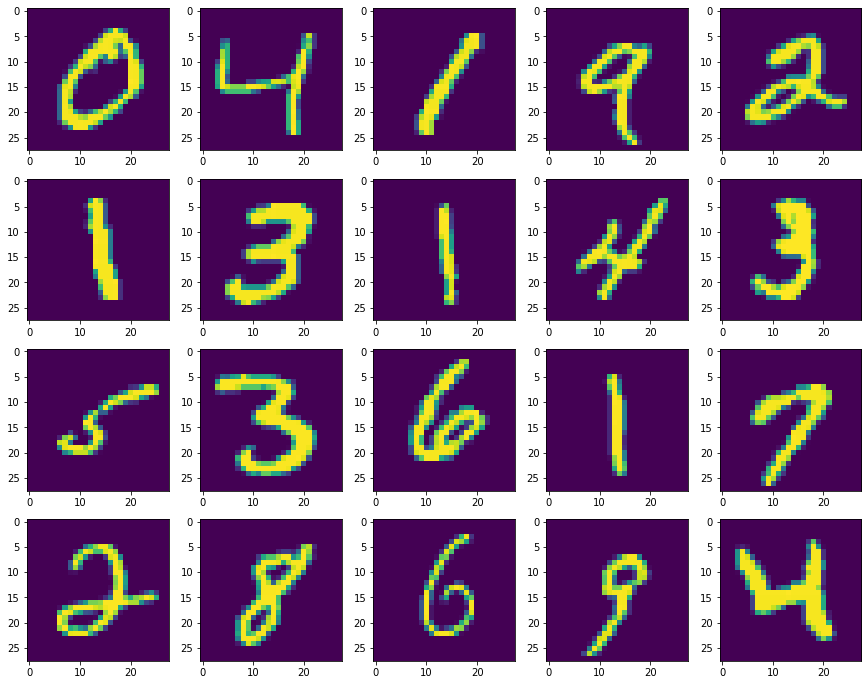

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
z=1 
for i in range(5):
    for j in range(4):
        plt.subplot(4, 5, z)
        plt.imshow(train_images[z,:,:,0])
        z += 1

![separador](https://i.imgur.com/4gX5WFr.png)
# Otro Toy Dataset: CIFAR10

![separador](https://i.imgur.com/4gX5WFr.png)

> * El dataset CIFAR-10 consiste en 60000 imágenes a color de 32x32 pertenencientes a 10 clases. 
> * Hay exactamente 6000 imagenes por clase.
> * De las 60000 imagenes, 50000 son para entrenamiento y 10000 para test.

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
from tensorflow.keras.datasets import cifar10

# Cargamos el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

n_train, img_width, img_height, n_channels = X_train.shape
n_test, _, _, _ = X_test.shape 

![separador](https://i.imgur.com/4gX5WFr.png)

### Acomodamos los datos de entrada al formato adecuado

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
input_dim = (img_width, img_height, n_channels)
input_dim

(32, 32, 3)

![separador](https://i.imgur.com/4gX5WFr.png)

### Creamos el modelo (reutilizamos la función creada previamente)

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
model_cifar = creo_modelo(input_shape = input_dim, output_shape=10, name="Modelo_para_CIFAR")
model_cifar.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

model_cifar.summary()


Model: "Modelo_para_CIFAR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 Max_pool_1 (MaxPooling2D)   (None, 15, 15, 32)        0         
                                                                 
 Conv_2 (Conv2D)             (None, 13, 13, 64)        18496     
                                                                 
 Max_pool_2 (MaxPooling2D)   (None, 6, 6, 64)          0         
                                                                 
 Conv_3 (Conv2D)             (None, 4, 4, 128)         73856     
                                                                 
 Flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 softmax_1 (Dense)           (None, 10)          

![separador](https://i.imgur.com/4gX5WFr.png)

### Entrenamos el modelo

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
results = model_cifar.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 57s 90ms/step - loss: 1.5635 - accuracy: 0.4297 - val_loss: 1.3164 - val_accuracy: 0.5365
Epoch 2/10
625/625 [==============================] - 56s 90ms/step - loss: 1.2274 - accuracy: 0.5652 - val_loss: 1.1895 - val_accuracy: 0.5843
Epoch 3/10
625/625 [==============================] - 56s 90ms/step - loss: 1.0718 - accuracy: 0.6242 - val_loss: 1.0879 - val_accuracy: 0.6225
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.9700 - accuracy: 0.6637 - val_loss: 1.0093 - val_accuracy: 0.6428
Epoch 5/10
625/625 [==============================] - 56s 90ms/step - loss: 0.8990 - accuracy: 0.6876 - val_loss: 0.9861 - val_accuracy: 0.6526
Epoch 6/10
625/625 [==============================] - 56s 90ms/step - loss: 0.8367 - accuracy: 0.7091 - val_loss: 0.9029 - val_accuracy: 0.6903
Epoch 7/10
625/625 [==============================] - 56s 90ms/step - loss: 0.7858 - accuracy: 0.7274 - val_loss: 0.8963 - val_accuracy:

![separador](https://i.imgur.com/4gX5WFr.png)

### Evaluamos el modelo

![separador](https://i.imgur.com/4gX5WFr.png)

In [ ]:
score = model_cifar.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.8837136030197144 / Test accuracy: 0.7008000016212463


![separador](https://i.imgur.com/4gX5WFr.png)

### Mostramos algunas imagenes para saber de que se trata el dataset

![separador](https://i.imgur.com/4gX5WFr.png)

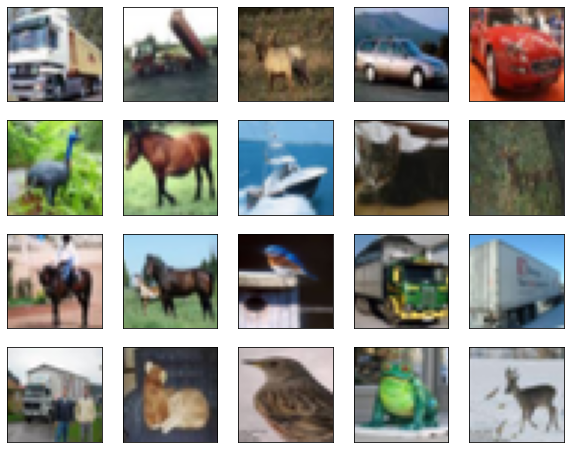

In [ ]:
plt.figure(figsize=(10,8))
z=1 
for i in range(5):
    for j in range(4):
        ax = plt.subplot(4, 5, z)
        plt.imshow(X_train[z,:,:])
        plt.setp(ax.get_xticklabels(), visible=False) # Para ocultar los ticks
        plt.setp(ax.get_yticklabels(), visible=False) # Para ocultar los ticks
        ax.tick_params(axis='both', which='both', length=0) # Para ocultar los ticks
        z += 1